# 117 Class Image Classification using Efficientnet

In this notebook I have used Efficientnet to classify images containing people in different Yoga poses 🧘 (Yogasanas). I have achieved highest validation accuracy of 75% in this notebook. Feel free to fork this notebook and try to improve the model accuracy 😀

---

**Dataset**

The data used in this notebook has been downloaded from Kaggle. 


*   There are 117 different classes
*   Images are in all shapes and sizes
*   Images are in `png`, `jpeg` and `gif` formats






In [1]:
# Importing required libraries

import numpy as np

import tensorflow as tf

import keras 
from keras import layers
from keras.models import Sequential, Model
from keras.preprocessing.image import image_dataset_from_directory

from PIL import Image
from google.colab import files

import matplotlib.pyplot as plt

import random
import os

### Loading and unziping data

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'shrutisaxena/yoga-pose-image-classification-dataset'
! unzip yoga-pose-image-classification-dataset.zip

### Reading dataset into Training and Validation sets

In [5]:
image_path = 'dataset'
input_shape = (256,256,3)
num_classes = 107

train_data = image_dataset_from_directory(
    image_path,
    batch_size=32,
    validation_split=0.1,
    subset="training",
    image_size=(256,256),
    seed=100,
    label_mode='categorical',
)

val_data = image_dataset_from_directory(
    image_path,
    batch_size=32,
    seed=100,
    validation_split=0.1,
    image_size=(256,256),
    subset="validation",
    label_mode='categorical',
)


Found 5993 files belonging to 107 classes.
Using 5394 files for training.
Found 5993 files belonging to 107 classes.
Using 599 files for validation.


### Visualizing Images in the training dataset

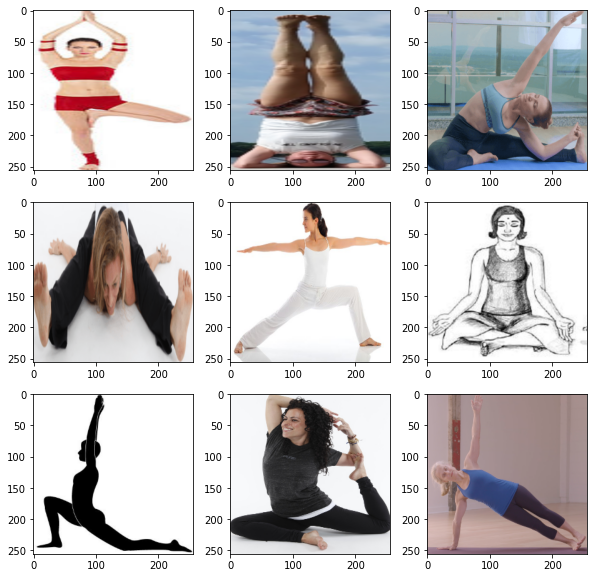

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))


In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
base_model=tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet",input_shape=input_shape, pooling='max')
x = base_model.output

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(107, activation="softmax")(x)
model = Model(base_model.input, predictions)

43950080/43941136 [==============================] - 1s 0us/step


In [9]:
model.compile(
  optimizer='adam',
  loss = 'categorical_crossentropy',
  metrics=['accuracy'])

In [10]:
reduce_lr  = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    verbose=1,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)

In [11]:
history = model.fit(train_data,validation_data=val_data,epochs=25,callbacks=[reduce_lr])

Epoch 1/25
169/169 [==============================] - 308s 1s/step - loss: 4.8959 - accuracy: 0.0254 - val_loss: 4.2766 - val_accuracy: 0.0701 - lr: 0.0010
Epoch 2/25
169/169 [==============================] - 231s 1s/step - loss: 3.8836 - accuracy: 0.1118 - val_loss: 2.9926 - val_accuracy: 0.2905 - lr: 0.0010
Epoch 3/25
169/169 [==============================] - 231s 1s/step - loss: 3.0082 - accuracy: 0.2469 - val_loss: 2.2045 - val_accuracy: 0.4023 - lr: 0.0010
Epoch 4/25
169/169 [==============================] - 231s 1s/step - loss: 2.3897 - accuracy: 0.3597 - val_loss: 2.1038 - val_accuracy: 0.4591 - lr: 0.0010
Epoch 5/25
169/169 [==============================] - 231s 1s/step - loss: 1.9004 - accuracy: 0.4624 - val_loss: 1.7128 - val_accuracy: 0.5609 - lr: 0.0010
Epoch 6/25
169/169 [==============================] - 231s 1s/step - loss: 1.5845 - accuracy: 0.5369 - val_loss: 1.8100 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 7/25
169/169 [==============================] - 231s 1s/st

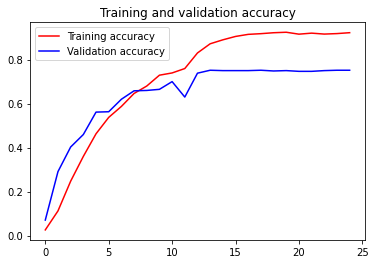

<Figure size 432x288 with 0 Axes>

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

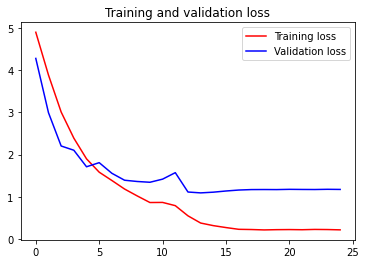

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()